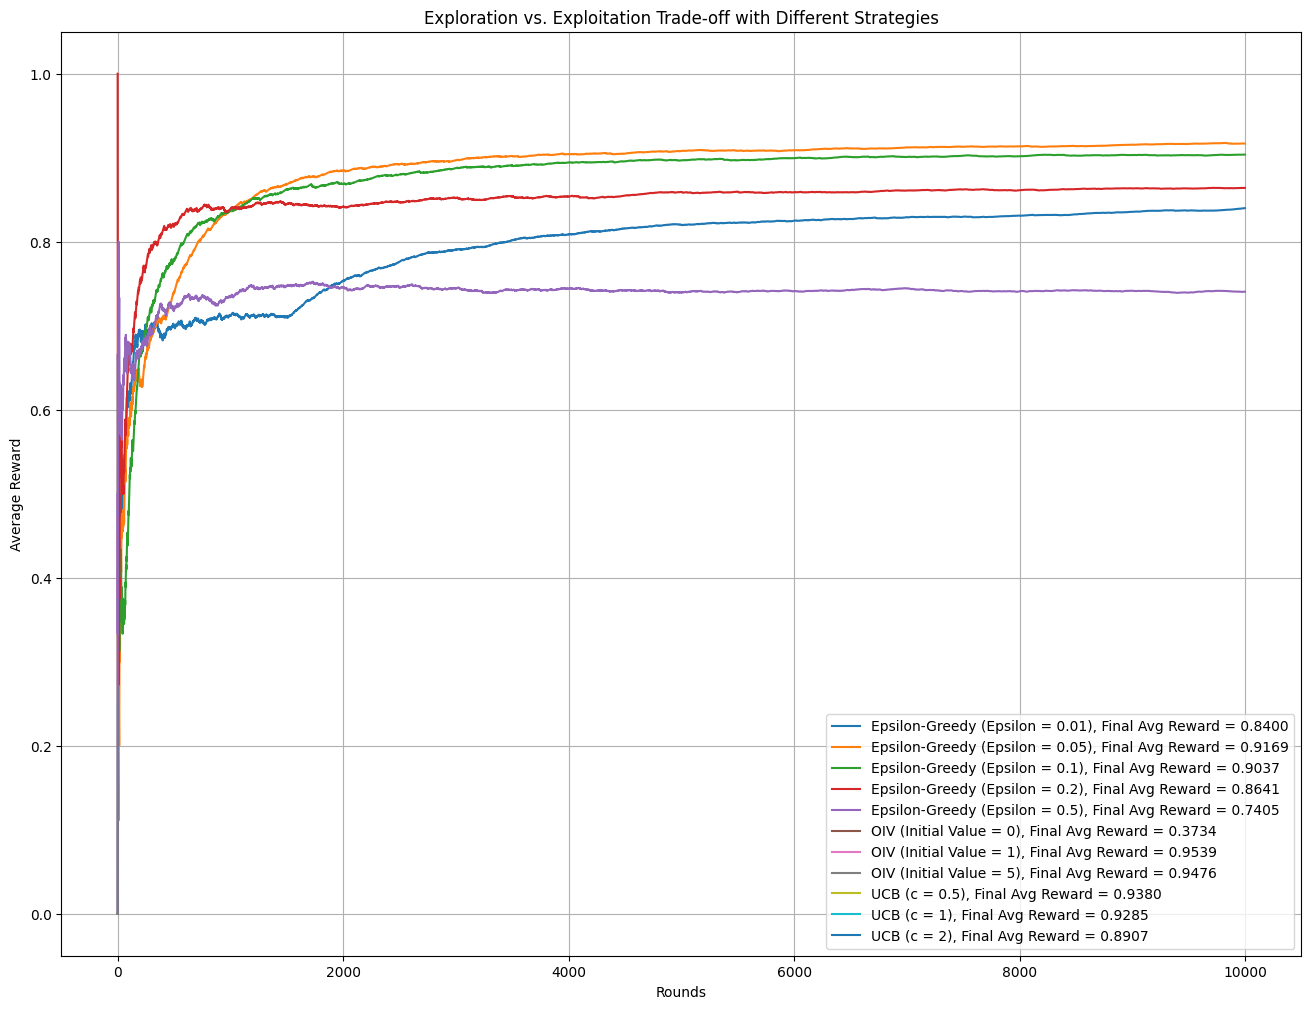

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Checkbox, VBox, interactive_output
from IPython.display import display, clear_output

# Set random seed for reproducibility
np.random.seed(42)

# Number of arms (bandits)
n_arms = 10
# Number of rounds
n_rounds = 10000
# Different epsilon values to evaluate
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5]
# Different initial values for Optimistic Initial Values (OIV)
initial_values = [0, 1, 5]
# Different confidence levels for UCB
ucb_c_values = [0.5, 1, 2]

# Generate true reward probabilities for each arm
true_probs = np.random.rand(n_arms)

def run_epsilon_greedy(epsilon, true_probs, n_rounds):
    n_arms = len(true_probs)
    Q_values = np.zeros(n_arms)
    action_counts = np.zeros(n_arms)
    rewards = np.zeros(n_rounds)
    
    for t in range(n_rounds):
        if np.random.rand() < epsilon:
            action = np.random.randint(n_arms)
        else:
            action = np.argmax(Q_values)
        
        reward = np.random.rand() < true_probs[action]
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]
        rewards[t] = reward
    
    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / (np.arange(n_rounds) + 1)
    
    return average_rewards

def run_optimistic_initial_values(initial_value, true_probs, n_rounds):
    n_arms = len(true_probs)
    Q_values = np.ones(n_arms) * initial_value
    action_counts = np.zeros(n_arms)
    rewards = np.zeros(n_rounds)
    
    for t in range(n_rounds):
        action = np.argmax(Q_values)
        reward = np.random.rand() < true_probs[action]
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]
        rewards[t] = reward
    
    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / (np.arange(n_rounds) + 1)
    
    return average_rewards

def run_ucb(c, true_probs, n_rounds):
    n_arms = len(true_probs)
    Q_values = np.zeros(n_arms)
    action_counts = np.zeros(n_arms)
    rewards = np.zeros(n_rounds)
    
    for t in range(n_rounds):
        if t < n_arms:
            action = t
        else:
            confidence_bounds = Q_values + c * np.sqrt(np.log(t + 1) / (action_counts + 1e-5))
            action = np.argmax(confidence_bounds)
        
        reward = np.random.rand() < true_probs[action]
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]
        rewards[t] = reward
    
    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / (np.arange(n_rounds) + 1)
    
    return average_rewards

# Initialize plot with reduced size
fig, ax = plt.subplots(figsize=(10, 6))

# Generate data for each strategy
results = {
    'Epsilon-Greedy': {epsilon: run_epsilon_greedy(epsilon, true_probs, n_rounds) for epsilon in epsilons},
    'Optimistic Initial Values': {initial_value: run_optimistic_initial_values(initial_value, true_probs, n_rounds) for initial_value in initial_values},
    'UCB': {c: run_ucb(c, true_probs, n_rounds) for c in ucb_c_values},
}

# Plot each strategy with the final average reward in the legend
lines = []
labels = []

for epsilon, data in results['Epsilon-Greedy'].items():
    final_avg_reward = data[-1]
    line, = ax.plot(data, label=f'Epsilon-Greedy (Epsilon = {epsilon}), Final Avg Reward = {final_avg_reward:.4f}')
    lines.append(line)
    labels.append(f'Epsilon-Greedy (Epsilon = {epsilon})')

for initial_value, data in results['Optimistic Initial Values'].items():
    final_avg_reward = data[-1]
    line, = ax.plot(data, label=f'OIV (Initial Value = {initial_value}), Final Avg Reward = {final_avg_reward:.4f}')
    lines.append(line)
    labels.append(f'OIV (Initial Value = {initial_value})')

for c, data in results['UCB'].items():
    final_avg_reward = data[-1]
    line, = ax.plot(data, label=f'UCB (c = {c}), Final Avg Reward = {final_avg_reward:.4f}')
    lines.append(line)
    labels.append(f'UCB (c = {c})')

ax.set_xlabel('Rounds')
ax.set_ylabel('Average Reward')
ax.set_title('Exploration vs. Exploitation Trade-off with Different Strategies')
ax.legend()
ax.grid(True)

# Create checkboxes
checkboxes = [Checkbox(value=True, description=label) for label in labels]

# Update function to show/hide lines based on checkbox state
def update(*args):
    for checkbox, line in zip(checkboxes, lines):
        line.set_visible(checkbox.value)
    clear_output(wait=True)
    display(VBox(checkboxes))
    display(fig)
    plt.draw()

# Attach the update function to each checkbox
for checkbox in checkboxes:
    checkbox.observe(update, 'value')

# Display the checkboxes and the plot
display(VBox(checkboxes))
display(fig)
